# Clasificación de Imágenes entre Perros y Gatos.

Resolveremos una competencia de clasificación de imágenes entre perros y gatos. Los datos provienen del dataset de [Kaggle.](https://www.kaggle.com/competitions/dogs-vs-cats/data)

![](woof_meow.jpg)

## Bibliotecas

Primero instalamos las bibliotecas.

In [ ]:
%pip install numpy pandas matplotlib tensorflow

Importamos las bibliotecas a utilizar.

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization

## Creación del modelo convolucional

Procedemos a crear nuestro modelo convolucional que clasificará si una imagen corresponde a un perro o a un gato.

In [ ]:
# Creamos un modelo secuencial
model = Sequential()

"""
Capa de entrada
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 32 kernels
        filters = 32, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
        # Datos de entrada de 150x150 pixeles con 3 canales
        input_shape = (150, 150, 3)
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))

"""
Capa de convolución 2
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 64 kernels
        filters = 64, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.2
model.add(Dropout(0.2))

"""
Capa de convolución 3
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.3
model.add(Dropout(0.3))

"""
Capa de convolución 4
"""
# Agregamos una capa de convolución
model.add(Conv2D(
        # 128 kernels
        filters = 128, 
        # Kernels de 3x3
        kernel_size = (3, 3),
        # Agregamos un padding para que las imágenes después del kernel tengan el mismo tamaño que las de entrada
        padding = "same",
        # Función de activación ReLu
        activation = "relu",
        # Utilizamos regularización Ridge con peso de 1e-5
        kernel_regularizer = regularizers.l2(1e-5),
    )
)
# Apilamos una capa de Batch Normalization
model.add(BatchNormalization())
# Apilamos una capa de MaxPooling para eliminar ruido de tamaño 2x2
model.add(MaxPooling2D(pool_size = (2, 2)))
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.4
model.add(Dropout(0.4))

"""
Capa de salida
"""
# Agregamos una capa Flatten para aplanar los datos y que queden en una sola dimensión
model.add(Flatten())
# Agregamos una capa de Dropout para vigilar el Overfitting; la probabilidad de drop será de 0.5
model.add(Dropout(0.5))
# Agregamos una capa Densa con 512 neuronas y activación ReLu
model.add(Dense(512, activation = "relu"))
# Agregamos la capa encargada de la clasificación binaria con activación Sigmoide
model.add(Dense(1, activation = "sigmoid"))

# Resumen del modelo
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 64)       256       
 hNormalization)                                                 
                                                      

## Data Augmentation

Utilizaremos la técnica de Data Augmentation para realizar pequeñas modificaciones a las imágenes que tenemos para generar nuevas imágenes que conserven las características de las originales; esto con el fin de tener más imágenes y mucho más ricas.

In [ ]:
# Creamos un generador de imágenes para Training
trainImgGen = ImageDataGenerator(
    # Escalar los valores de las imágenes para que vayan entre 0 y 1
    rescale = 1. / 255,
    # Rotación de 40°
    rotation_range = 40,
    # Movimiento horizontal
    width_shift_range = 0.2,
    # Movimiento vertical
    height_shift_range = 0.2,
    # Cortar
    shear_range = 0.2,
    # Zoom
    zoom_range = 0.2,
    # Rotación horizontal
    horizontal_flip = True,
    # Rotación vertical
    vertical_flip = True,
    # Rellenar los espacios vacíos de la imagen al momento de transformarla
    fill_mode = "nearest",
)

# Creamos un generador de imágenes para  Test simplemente escalando los valores para que vayan de 0 a 1
testDataGen = ImageDataGenerator(rescale = 1. / 255)

### Reescalar los datos

Con nuestro generador de imágenes procedemos a realizar el reescalado y las modificaciones a las imágenes cargándolas directamente del directorio.

In [ ]:
# Generamos imágenes para training cargándolas de un directorio
trainGenerator = trainImgGen.flow_from_directory("catsDogs/train",
    # Tamaño de las imágenes
    target_size = (150, 150),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación binaria
    class_mode = "binary"
)

# Generamos imágenes para validation cargándolas de un directorio y solamente reescalándolas
validationGenerator = testDataGen.flow_from_directory("catsDogs/validation",
    # Tamaño de las imágenes
    target_size = (150, 150),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación binaria
    class_mode = "binary"
)

# Generamos imágenes para testing cargándolas de un directorio y solamente reescalándolas
testGenerator = testDataGen.flow_from_directory("catsDogs/test",
    # Tamaño de las imágenes
    target_size = (150, 150),
    # Paquetes de a 64 imágenes
    batch_size = 64,
    # Clasificación binaria
    class_mode = "binary"
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vemos que encontró 2000 imágenes en 2 clases (perros y gatos) para training; 1000 para validation y otras 1000 para testing.

### Callbacks

También utilizaremos un callback de checkpoint para guardar los pesos del mejor modelo a medida que se realiza el entrenamiento.

In [ ]:
checkpoint = ModelCheckpoint(
    # Nombre del archivo. La extensión hdf5 es usada para guardar los pesos del modelo
    filepath = "catsVsDogs.hdf5",
    verbose = 1,
    # Métrica que queremos monitorear
    monitor = "val_accuracy",
    # Solo guardar los mejores pesos
    save_best_only = True
)

early = EarlyStopping(
    # Métrica que monitoreamos para ver si deja de mejorar
    monitor = "val_accuracy",
    # Número de iteraciones que espera para ver si la métrica no mejora
    patience = 15
)

### Compilar el modelo

Compilamos nuestro modelo especificando el optimizador, la función de pérdida y la métrica para hacer la evaluación.

In [ ]:
model.compile(
    # Función de pérdida Binary Cross Entropy
    loss = "binary_crossentropy",
    # Como optimizador utilizamos Adam que combina las bondades de AdaGrad y RMSProp
    optimizer = optimizers.Adam(),
    # Como métrica utilizamos el Accuracy Score
    metrics = "accuracy"
)

### Entrenamiento del modelo

Ahora entrenamos el modelo.

In [ ]:
# Entrenamos el modelo con nuestro Data Generator
hist = model.fit(
    # Utiliza las imágenes generadas por el Train Generator
    trainGenerator,
    # Utilizar los callbacks que creamos
    callbacks = [checkpoint],
    # Pasos por épocas igual a la cantidad de imágenes para training divido el tamaño de los batches
    steps_per_epoch = 2000 // 64,
    # Entrenamos por 80 épocas
    epochs = 80,
    # Para validación utilizamos las imágenes generadas por el Validation Generator
    validation_data = validationGenerator,
    # Pasos para validación igual a la cantidad de imágenes para testing divido el tamaño de los batches
    validation_steps = 1000 // 64,
    verbose = 2,
    # Mezclar los datos
    shuffle = True
)

Epoch 1/60

Epoch 1: val_accuracy improved from -inf to 0.51562, saving model to catsVsDogs.hdf5
31/31 - 81s - loss: 0.6798 - accuracy: 0.6136 - val_loss: 0.8559 - val_accuracy: 0.5156 - 81s/epoch - 3s/step
Epoch 2/60

Epoch 2: val_accuracy did not improve from 0.51562
31/31 - 73s - loss: 0.6799 - accuracy: 0.6038 - val_loss: 2.2453 - val_accuracy: 0.5021 - 73s/epoch - 2s/step
Epoch 3/60

Epoch 3: val_accuracy did not improve from 0.51562
31/31 - 77s - loss: 0.6732 - accuracy: 0.6136 - val_loss: 2.9985 - val_accuracy: 0.4990 - 77s/epoch - 2s/step
Epoch 4/60

Epoch 4: val_accuracy did not improve from 0.51562
31/31 - 73s - loss: 0.6655 - accuracy: 0.6209 - val_loss: 2.0358 - val_accuracy: 0.4990 - 73s/epoch - 2s/step
Epoch 5/60

Epoch 5: val_accuracy improved from 0.51562 to 0.53333, saving model to catsVsDogs.hdf5
31/31 - 75s - loss: 0.6321 - accuracy: 0.6410 - val_loss: 0.8928 - val_accuracy: 0.5333 - 75s/epoch - 2s/step
Epoch 6/60

Epoch 6: val_accuracy did not improve from 0.53333
3

### Evaluación del modelo

Visualizamos el Accuracy del modelo obtenido a lo largo de las iteraciones con los datos de training y validation.

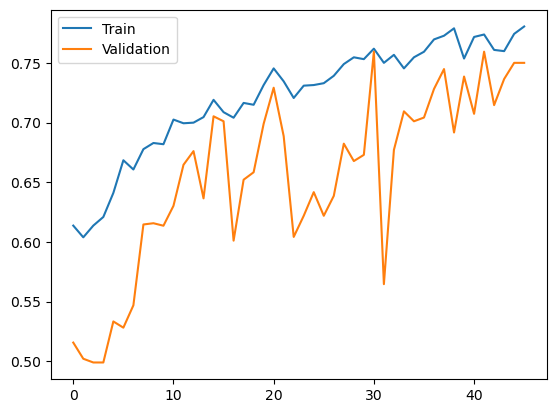

In [ ]:
plt.plot(hist.history["accuracy"], label = "Train")
plt.plot(hist.history["val_accuracy"], label = "Validation")
plt.legend()
plt.show()

Podemos observar que no hay evidencia de overfitting ya que el accuracy para testing y validation se mantuvieron parecidos.

In [ ]:
model.evaluate(testGenerator)

16/16 [==============================] - 23s 1s/step - loss: 0.5665 - accuracy: 0.7170


[0.5665481090545654, 0.7170000076293945]

Finalmente, nuestro modelo tiene un accuracy del 71.7%